In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv('/content/drive/MyDrive/LatLong.csv',sep=";")
data.head()

,Longitude,Latitude
0,36.861544,-5.177747
1,51.463766,5.392935
2,51.190492,4.453765
3,51.326247,6.085953
4,51.463766,5.392935


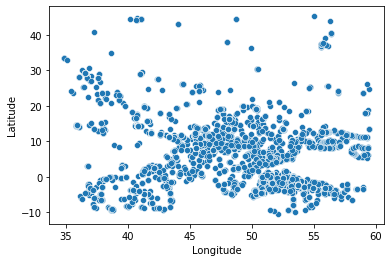

In [18]:
sns.scatterplot(data=data, x="Longitude", y="Latitude")

In [61]:
X = data.values
def calculate_cost(X, centroids, cluster):  
  sum = 0  
  for i, val in enumerate(X):    
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)  
  return sum

In [62]:
def kmeans(X, k):  
  diff = 1  
  cluster = np.zeros(X.shape[0])  
  centroids = data.sample(n=k).values  
  while diff:     
    for i, row in enumerate(X):         
      mn_dist = float('inf')        
      for idx, centroid in enumerate(centroids):            
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)            
        if mn_dist > d:               
          mn_dist = d               
          cluster[i] = idx     
    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values     
    if np.count_nonzero(centroids-new_centroids) == 0:        
       diff = 0      
    else:        
      centroids = new_centroids  
  return centroids, cluster

In [71]:
cost_list = []
for k in range(1, 10):    
  centroids, cluster = kmeans(X, k)    
  cost = calculate_cost(X, centroids, cluster)    
  cost_list.append(cost)

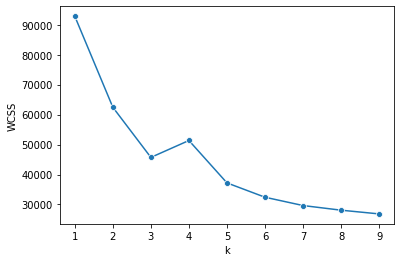

In [64]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [72]:
k =3
centroids, cluster = kmeans(X, k)

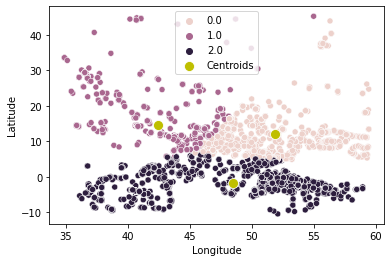

In [73]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y', label = 'Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()